In [2]:
from google.colab import files
uploaded = files.upload()

Saving housepricedata.csv to housepricedata.csv


In [10]:
import pandas as pd 
data = pd.read_csv("housepricedata.csv") #load into dataframe
data.head() #check out top of dataframe

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [12]:
arr = data.values #turn into array

xvalues = arr[:,0:10]
yvalues = arr[:,10]

print(xvalues)

[[ 8450     7     5 ...     8     0   548]
 [ 9600     6     8 ...     6     1   460]
 [11250     7     5 ...     6     1   608]
 ...
 [ 9042     7     9 ...     9     2   252]
 [ 9717     5     6 ...     5     0   240]
 [ 9937     5     6 ...     6     0   276]]


In [13]:
print(yvalues)

[1 1 1 ... 1 0 0]


In [14]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
xvalues_scale = min_max_scaler.fit_transform(xvalues)

xvalues_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [15]:
from sklearn.model_selection import train_test_split
#splits data into train and (val and test) then splits val and tests apart
xvalues_train, xvalues_val_and_test, yvalues_train, yvalues_val_and_test = train_test_split(xvalues_scale, yvalues, test_size=0.3)
xvalues_val, xvalues_test, yvalues_val, yvalues_test = train_test_split(xvalues_val_and_test, yvalues_val_and_test, test_size=0.5)

In [16]:

from keras.models import Sequential
from keras.layers import Dense

In [18]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [19]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
hist = model.fit(xvalues_train, yvalues_train,
          batch_size=32, epochs=100,
          validation_data=(xvalues_val, yvalues_val))

Epoch 1/100
32/32 [==============================] - 1s 14ms/step - loss: 0.6892 - accuracy: 0.5372 - val_loss: 0.6817 - val_accuracy: 0.7397
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.7162 - val_loss: 0.6749 - val_accuracy: 0.7717
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.7499 - val_loss: 0.6692 - val_accuracy: 0.7397
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6703 - accuracy: 0.7194 - val_loss: 0.6643 - val_accuracy: 0.7078
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6668 - accuracy: 0.6833 - val_loss: 0.6602 - val_accuracy: 0.7169
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6614 - accuracy: 0.7129 - val_loss: 0.6563 - val_accuracy: 0.7397
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6592 - accuracy: 0.7450 - val_loss: 0.6523 - val_accuracy: 0.7443
Epoch 8/100


In [21]:

model.evaluate(xvalues_test, yvalues_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.3106 - accuracy: 0.8584


[0.31062597036361694, 0.8584474921226501]

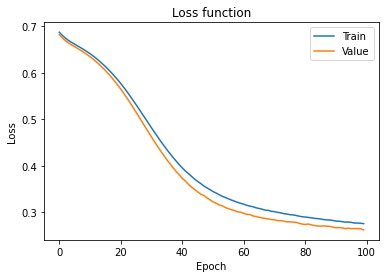

In [22]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Value'])
plt.show()

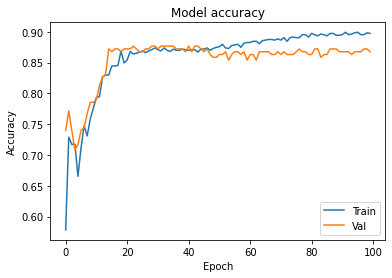

In [23]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [27]:
#overfit model

model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [29]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(xvalues_train, yvalues_train,
          batch_size=32, epochs=100,
          validation_data=(xvalues_val, yvalues_val))

Epoch 1/100
32/32 [==============================] - 2s 43ms/step - loss: 0.5221 - accuracy: 0.7455 - val_loss: 0.3464 - val_accuracy: 0.8721
Epoch 2/100
32/32 [==============================] - 1s 43ms/step - loss: 0.3643 - accuracy: 0.8486 - val_loss: 0.2845 - val_accuracy: 0.8721
Epoch 3/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3192 - accuracy: 0.8701 - val_loss: 0.2849 - val_accuracy: 0.8676
Epoch 4/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2823 - accuracy: 0.8817 - val_loss: 0.4206 - val_accuracy: 0.8447
Epoch 5/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3597 - accuracy: 0.8662 - val_loss: 0.2370 - val_accuracy: 0.9041
Epoch 6/100
32/32 [==============================] - 1s 39ms/step - loss: 0.2805 - accuracy: 0.8805 - val_loss: 0.2585 - val_accuracy: 0.8767
Epoch 7/100
32/32 [==============================] - 1s 39ms/step - loss: 0.2739 - accuracy: 0.8826 - val_loss: 0.2498 - val_accuracy: 0.8676
Epoch 

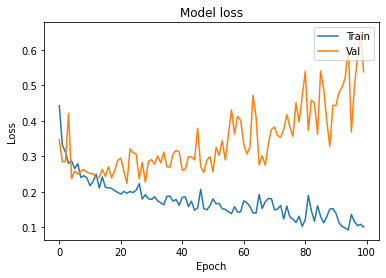

In [30]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

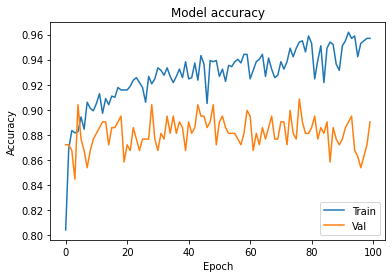

In [33]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [34]:
#Try to reduce overfitting 

from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [36]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(xvalues_train, yvalues_train,
          batch_size=32, epochs=100,
          validation_data=(xvalues_val, yvalues_val))

Epoch 1/100
32/32 [==============================] - 3s 58ms/step - loss: 21.1096 - accuracy: 0.5448 - val_loss: 3.8900 - val_accuracy: 0.8858
Epoch 2/100
32/32 [==============================] - 1s 47ms/step - loss: 2.4824 - accuracy: 0.8509 - val_loss: 0.6578 - val_accuracy: 0.8493
Epoch 3/100
32/32 [==============================] - 2s 49ms/step - loss: 0.6124 - accuracy: 0.8648 - val_loss: 0.5215 - val_accuracy: 0.8721
Epoch 4/100
32/32 [==============================] - 2s 50ms/step - loss: 0.5140 - accuracy: 0.8720 - val_loss: 0.5225 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 2s 49ms/step - loss: 0.5339 - accuracy: 0.8408 - val_loss: 0.5348 - val_accuracy: 0.8493
Epoch 6/100
32/32 [==============================] - 2s 49ms/step - loss: 0.5192 - accuracy: 0.8441 - val_loss: 0.4591 - val_accuracy: 0.8813
Epoch 7/100
32/32 [==============================] - 2s 48ms/step - loss: 0.4689 - accuracy: 0.8867 - val_loss: 0.4548 - val_accuracy: 0.8539
Epoch

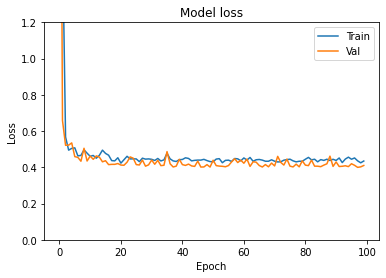

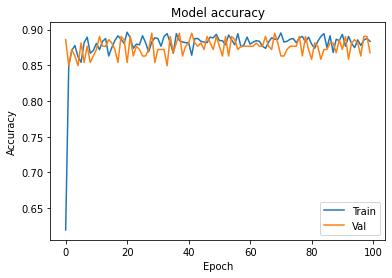

In [38]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()